In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import struct
import matplotlib.pyplot as plt

In [2]:
def one_hot_encoding(y, num_labels):
    y_enc = tf.one_hot(y, num_labels, axis=-1)
    
    return y_enc

In [3]:
def load_data():
    with open('mnist/train-labels.idx1-ubyte', 'rb') as labels:
        magic, n = struct.unpack(">II", labels.read(8))
        train_labels = np.fromfile(labels, dtype=np.uint8)
    with open("mnist/train-images.idx3-ubyte", 'rb') as imgs:
        magic, num, nrows, ncols = struct.unpack(">IIII", imgs.read(16))
        train_images = np.fromfile(imgs, dtype=np.uint8).reshape(num, 28, 28, 1)
    with open('mnist/t10k-labels.idx1-ubyte', 'rb') as labels:
        magic, n = struct.unpack(">II", labels.read(8))
        test_labels = np.fromfile(labels, dtype=np.uint8)
    with open("mnist/t10k-images.idx3-ubyte", 'rb') as imgs:
        magic, num, nrows, ncols = struct.unpack(">IIII", imgs.read(16))
        test_images = np.fromfile(imgs, dtype=np.uint8).reshape(num, 28, 28, 1)

    return train_images, train_labels, test_images, test_labels

In [4]:
def load_dataset():
    X_train, Y_train, X_test, Y_test = load_data()

    X_train, X_test = X_train / 255, X_test / 255
    Y_train, Y_test = Y_train.reshape((Y_train.shape[0], 1)), Y_test.reshape((Y_test.shape[0], 1))

    return X_train, Y_train, X_test, Y_test

In [5]:
def visualize_data(img_array, label_array, idx):
    fig, ax = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True)
    ax = ax.flatten()
    for i in range(64):
        img = img_array[i, :, :]
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f"t: {label_array[i]}")
    plt.show()

In [6]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3 ,3 ), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'))
    model.add(layers.BatchNormalization(name='batch_norm_1'))
    model.add(layers.MaxPooling2D((2, 2), name='maxpool_1'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
    model.add(layers.BatchNormalization(name='batch_norm_2'))
    model.add(layers.MaxPooling2D((2, 2), name='maxpool_2'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(10))
    
    return model

In [7]:
X_train, Y_train, X_test, Y_test = load_dataset()
# Y_train, Y_test = one_hot_encoding(Y_train_orig, 10), one_hot_encoding(Y_test_orig, 10)

# # Reshape Y_train and Y_test
# Y_train = Y_train.reshape(Y_train.shape[0], Y_train.shape[-1])
# Y_test = Y_test.reshape(Y_test.shape[0], Y_test.shape[-1])

FileNotFoundError: [Errno 2] No such file or directory: 'mnist/train-labels.idx1-ubyte'

In [ ]:
visualize_data(X_train, Y_train_orig, 5)

In [ ]:
print(Y_train.shape, Y_test.shape)

In [ ]:
model = create_model()
model.summary()

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
plt.show()

In [ ]:
def predict(model, X, Y, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15 ,15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap="Greys", interpolation='nearest')
        ax[i].set_title(f't: {Y[i]} p: {y_pred}')
        

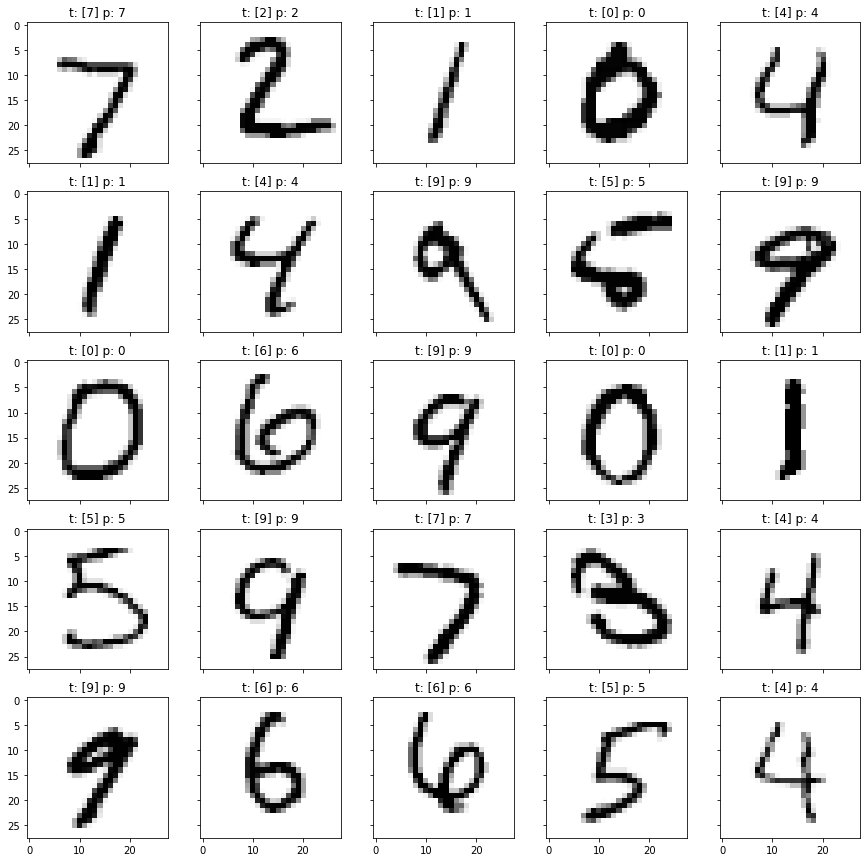

In [158]:
imgs = 25
preds = predict(model, X_test, Y_test, imgs)

In [159]:
# Save model
model.save("CNN_2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN_2\assets
